In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
dataframe = pd.read_csv('airbnb_listing_train.csv')
testdataframe = pd.read_csv('airbnb_listing_validate.csv')

dataframe.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,price
0,11602914,Luxury home 100m2+garden in center!,3123809,Marjolein,NaN,De Pijp - Rivierenbuurt,52.35368,4.90177,Entire home/apt,3,13,15-02-2020,0.27,1,0,220
1,13289321,East is where your home is!,10259430,Ana,NaN,Oud-Oost,52.35728,4.92052,Entire home/apt,4,14,19-06-2019,0.29,1,0,110
2,40779315,Amsterdam Central - LUXURY house in BUSY STREET,224969266,Mark,NaN,Centrum-West,52.37582,4.89850,Entire home/apt,2,9,16-03-2020,1.65,1,7,100
3,7820311,great appartment down town,693472,Ayden,NaN,Westerpark,52.37792,4.87300,Entire home/apt,3,42,17-02-2020,0.72,1,0,130
4,27346603,Private room with canal view in peaceful area,41888346,Alissa,NaN,Westerpark,52.38051,4.87493,Private room,2,89,26-02-2020,4.02,1,24,90


In [2]:
dataframe.drop_duplicates(inplace=True)

In [3]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12901 entries, 0 to 12900
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12901 non-null  int64  
 1   name                            12879 non-null  object 
 2   host_id                         12901 non-null  int64  
 3   host_name                       12893 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   12901 non-null  object 
 6   latitude                        12901 non-null  float64
 7   longitude                       12901 non-null  float64
 8   room_type                       12901 non-null  object 
 9   minimum_nights                  12901 non-null  int64  
 10  number_of_reviews               12901 non-null  int64  
 11  last_review                     11305 non-null  object 
 12  reviews_per_month               

In [4]:
dataframe.corr()

,id,host_id,neighbourhood_group,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price
id,1.000000,0.515113,NaN,0.006057,0.013995,-0.029802,-0.288677,0.034130,0.120712,0.046201,0.076998
host_id,0.515113,1.000000,NaN,0.001604,0.026642,-0.023976,-0.114027,0.105957,0.034070,0.121035,0.084512
neighbourhood_group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,0.006057,0.001604,NaN,1.000000,-0.154782,-0.005808,0.028620,0.025989,0.006339,0.034516,0.017697
longitude,0.013995,0.026642,NaN,-0.154782,1.000000,-0.001425,0.004946,0.019858,0.018887,0.036329,0.016718
minimum_nights,-0.029802,-0.023976,NaN,-0.005808,-0.001425,1.000000,-0.022010,-0.029696,-0.006950,0.056951,0.026569
number_of_reviews,-0.288677,-0.114027,NaN,0.028620,0.004946,-0.022010,1.000000,0.768207,-0.020619,0.274252,-0.035141
reviews_per_month,0.034130,0.105957,NaN,0.025989,0.019858,-0.029696,0.768207,1.000000,0.014680,0.304831,-0.003736
calculated_host_listings_count,0.120712,0.034070,NaN,0.006339,0.018887,-0.006950,-0.020619,0.014680,1.000000,0.095783,0.057314
availability_365,0.046201,0.121035,NaN,0.034516,0.036329,0.056951,0.274252,0.304831,0.095783,1.000000,0.153993


In [5]:
dataframe.drop(['neighbourhood_group','host_name','host_id','id','name','latitude','longitude','last_review'],axis=1,inplace=True)
testdataframe.drop(['neighbourhood_group','host_name','host_id','id','name','latitude','longitude','last_review'],axis=1,inplace=True)

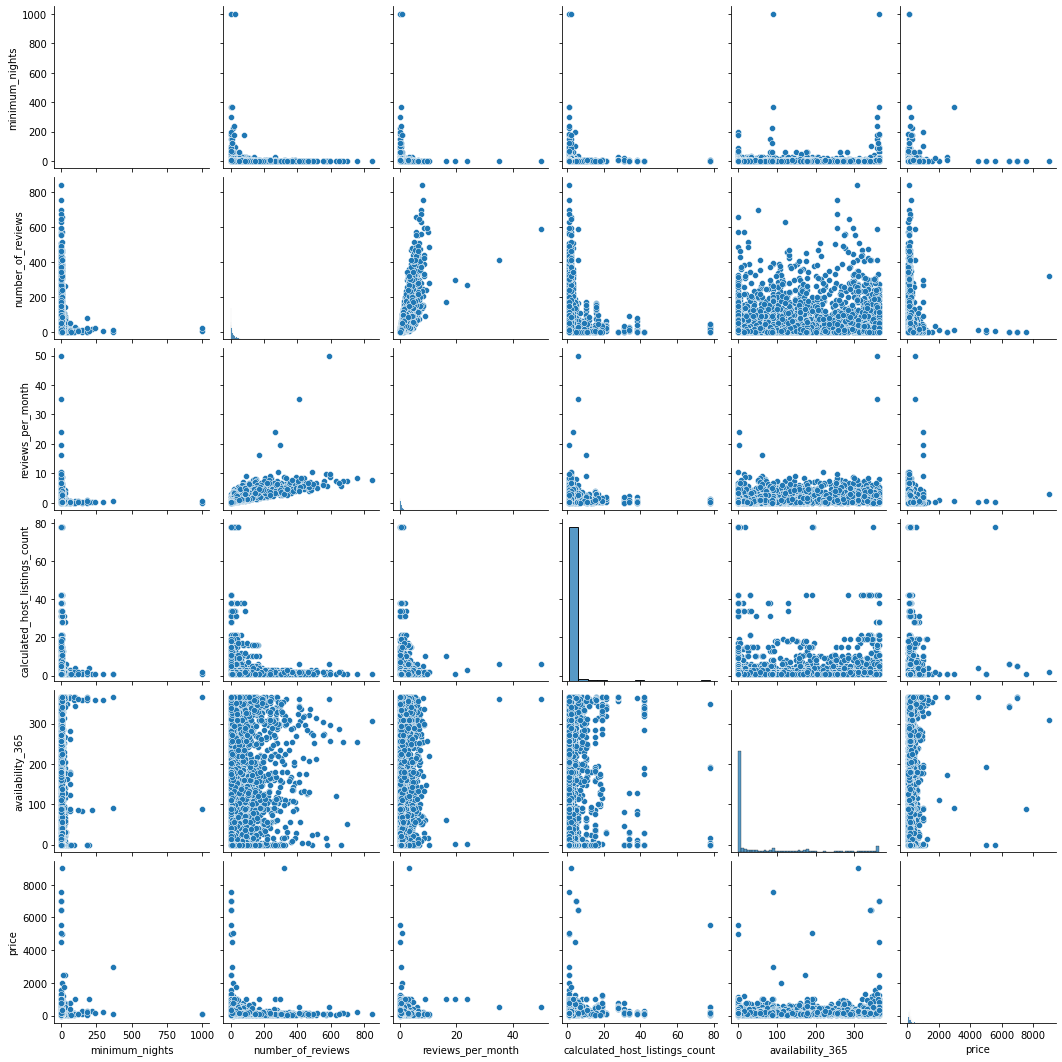

In [6]:
sns.pairplot(dataframe)

In [7]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in dataframe.select_dtypes(exclude=np.number):
    le.fit(dataframe[col])
    dataframe[col] = le.transform(dataframe[col])
    testdataframe[col] = le.transform(testdataframe[col])

In [8]:
dataframe = dataframe.fillna(0)
testdataframe = testdataframe.fillna(0)

<AxesSubplot:>

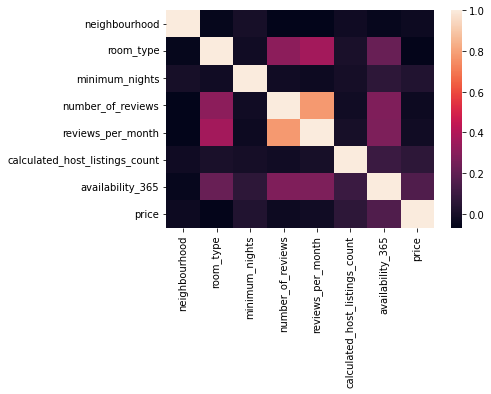

In [9]:
sns.heatmap(data=dataframe.corr())

In [10]:
X_data = dataframe.iloc[:,0:7]
Y_data = dataframe.iloc[:,7]

In [11]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_data = ss.fit_transform(X_data)
testdataframe = ss.transform(testdataframe)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,test_size=0.3)

In [12]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.053089192260990625

In [13]:
las = Lasso()
las.fit(X_train,Y_train)
las.score(X_test,Y_test)

0.05336361357214425

In [14]:
rid = Ridge()
rid.fit(X_train,Y_train)
rid.score(X_test,Y_test)

0.05308976763208928

In [15]:
testpred = las.predict(testdataframe)
testpred

array([255.29895418, 226.64063506, 151.74454524, ..., 114.02038645,
       156.87873215, 160.46348758])